In [12]:
%load_ext autoreload
%autoreload 2
from evaluation_scripts.experiment_class import Experiment
from evaluation_scripts.statistics import summarize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import matplotlib.patches as mpatch
from evaluation_scripts.oneway import OneWaySignificance
from figures import Figure, styles
#from style import Style

date = "20220412"
exp = Experiment(date)
Data = exp.data
dt = 4

#style = Style("white", fontsize = 20)
figure = Figure(styles["paper"])
palette = sns.color_palette("colorblind")
palette

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Summerize Data

In [8]:
Data["single_resistant"] = (Data.phenotype.isin(["A_r", "B_r", "A&B"]))
Data["resistant"] = (Data.phenotype.isin(["A_r", "B_r", "A&B", "AB_r"]))
Data["U"] = (Data.phenotype == "U")
Data["double_resistant"] = (Data.phenotype == "AB_r")
t_max = max(Data.transfer_n)
Data_end = Data[Data.transfer_n > t_max-dt]
cols = ["strategy", "transfer_n", "rep", "single_resistant", "U", "double_resistant", "resistant"]
Data_end = Data_end[cols]
groups = ["strategy", "rep"]

group_col = "strategy"

alpha = 0.05

In [9]:
summary_u = summarize(Data_end, groups, "U")
summary_res = summarize(Data_end, groups, "single_resistant")
summary_ab = summarize(Data_end, groups, "double_resistant")
summary_r = summarize(Data_end, groups, "resistant")

In [16]:
summaries = [summary_u, summary_res, summary_ab]
labels = ["U_mean", "single_resistant_mean", "double_resistant_mean"]
colors = [palette[0], palette[1], palette[2]]
color_dict = dict(zip(labels, colors))
x_offsets = [-0.25, 0, 0.25]
new_dfs = []

for df, col in zip(summaries, labels):
    if col in df.columns:
        new_df = pd.DataFrame({
            'strategy': df['strategy'],
            'f': df[col],
            'profile': col
        })
        new_dfs.append(new_df)
result_df = pd.concat(new_dfs, ignore_index=True)

In [18]:
_, ax = figure.create_figure_with_style(figsize = (16,6))
summaries = []
for summary,label,color, dx in zip(summaries, labels, colors, x_offsets):
    col = summary.columns[-1]
    significance = OneWaySignificance(summary, "strategy", col)
    significance.plot(dot_color = color,  order = exp.strategies, jitter =.1, violin = False, bar_color = color, strip = False, ax = ax, dx = dx)
    l = label.split("_")[0]
    
    significance.write_anova_results(os.path.join(exp.pathes["tables"], exp.exp +l + "_anova.tex"))
    if significance.anova_pvalue < 0.05:
        significance.write_tukey_results(os.path.join(exp.pathes["tables"], exp.exp +l + "_tukey.tex"))
    
sns.stripplot(data = result_df, 
             y = "f", x = "strategy", hue = "profile", s = 15, order = exp.strategies, palette = color_dict, alpha = .2)
ax.set_ylabel("resistance profile frequency")
ax.set_xlabel(None)
ax.set_ylim([-.05, 1.1])

ax.get_legend().remove()
if exp.exp == "20210417":
    new_handles = []
    for label, color in zip(['uninfected', 'single-resistant', 'double-resistant'], colors):
        new_handles.append(mpatch.Patch(color=color, label=label))
        ax.legend(handles=new_handles, loc='best')

#plt.savefig(os.path.join(exp.pathes["analysis"], "ep_anova_"+date+".pdf"), format='pdf')

In [ ]:
significance = OneWaySignificance(summaries[0], "strategy", "U_mean")


In [ ]:
significance.anova_result

In [ ]:
exp.strategies

In [20]:
summary

,strategy,rep,double_resistant_sum,double_resistant_total,double_resistant_mean
0,Combination,0,0,376,0.000000
1,Combination,1,0,376,0.000000
2,Combination,2,0,376,0.000000
3,Combination,3,0,376,0.000000
4,Cycling,0,17,376,0.045213
5,Cycling,1,13,376,0.034574
6,Cycling,2,28,376,0.074468
7,Cycling,3,29,376,0.077128
8,Mixing,0,24,376,0.063830
9,Mixing,1,18,376,0.047872


In [21]:
summaries

[        strategy  rep  U_sum  U_total    U_mean
 0    Combination    0    325      376  0.864362
 1    Combination    1    298      376  0.792553
 2    Combination    2    302      376  0.803191
 3    Combination    3    313      376  0.832447
 4        Cycling    0    198      376  0.526596
 5        Cycling    1    218      376  0.579787
 6        Cycling    2    184      376  0.489362
 7        Cycling    3    177      376  0.470745
 8         Mixing    0    165      376  0.438830
 9         Mixing    1    166      376  0.441489
 10        Mixing    2    171      376  0.454787
 11        Mixing    3    156      376  0.414894
 12        Mono A    0    152      376  0.404255
 13        Mono A    1    161      376  0.428191
 14        Mono A    2    151      376  0.401596
 15        Mono A    3    151      376  0.401596
 16        Mono B    0    123      376  0.327128
 17        Mono B    1    110      376  0.292553
 18        Mono B    2    134      376  0.356383
 19        Mono B   

In [25]:
from functools import reduce
merged_df = reduce(lambda left, right: pd.merge(left, right, on=['strategy', 'rep']), summaries)
condensed_df = pd.melt(merged_df, id_vars=['strategy', 'rep'], 
                       value_vars=["U_mean", "single_resistant_mean", "double_resistant_mean"],
                       var_name='label', value_name='value')
condensed_df

,strategy,rep,label,value
0,Combination,0,U_mean,0.864362
1,Combination,1,U_mean,0.792553
2,Combination,2,U_mean,0.803191
3,Combination,3,U_mean,0.832447
4,Cycling,0,U_mean,0.526596
...,...,...,...,...
67,Mono B,3,double_resistant_mean,0.074468
68,No treatment,0,double_resistant_mean,0.218085
69,No treatment,1,double_resistant_mean,0.164894
70,No treatment,2,double_resistant_mean,0.223404


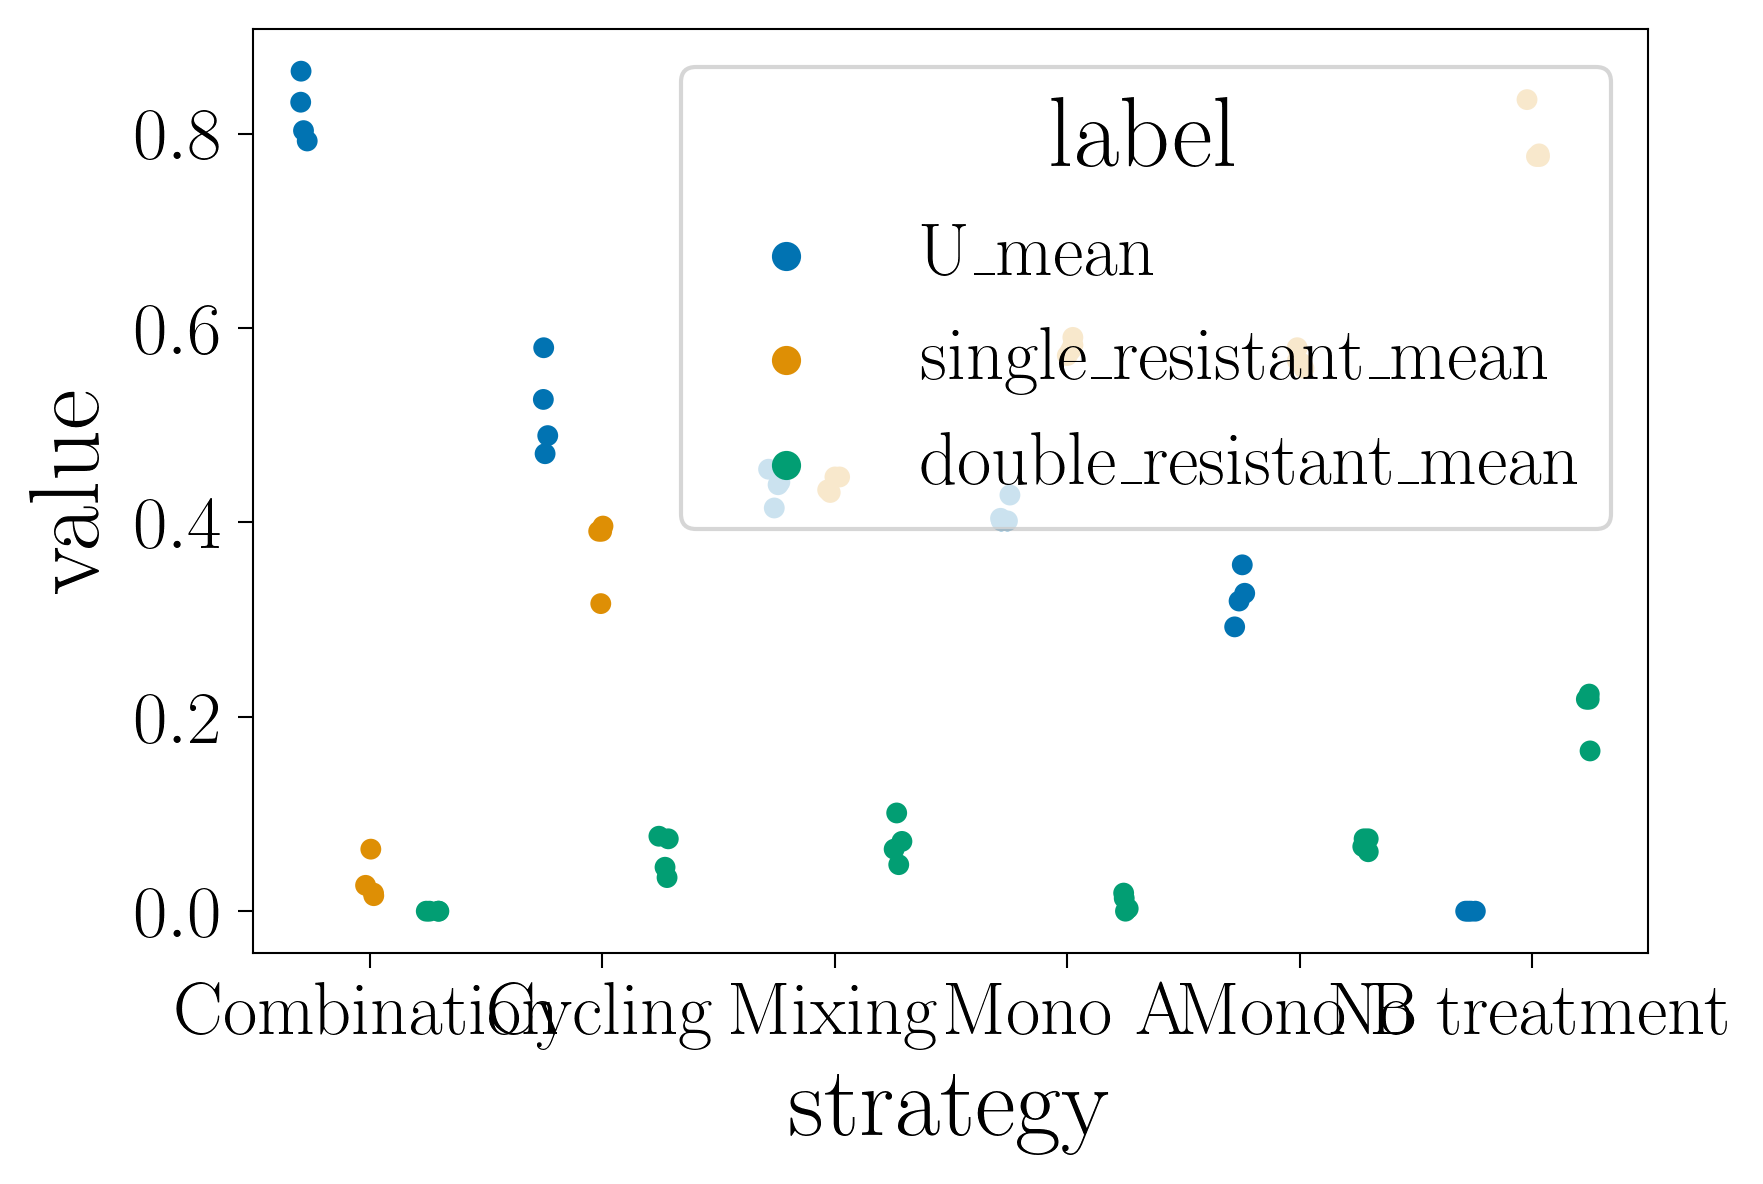

In [34]:
sns.stripplot(condensed_df, x = "strategy", hue = "label", y = "value", palette = color_dict, dodge = True)
plt.show()